<div align="center">
  <h1>Conflicting updates (GPT2-small)</h1>
</div>


<div align="center">
<img src="../figs/dissonant_experiment.png" alt="Overview of our experimental pipeline" width="1000" height="auto" style="background-color: white;">
</div>

<div align="center">
<h3> Learning rates used in the paper:</h3>


| Knowledge | Dataset name  | Strategy | LR | epochs |
|:---------:|:------------:|:--------:|:---:|:------:|
| *Old Facts* | Dataset A | Full Finetuning | `0.001`  | 10|
| *New Facts* | Dataset B | Full Finetuning | `0.001`  | 10  |
| *Conflicting* | Dataset NotB | Full Finetuning + LoRa | `0.001` | 20 |
| *Conflicting* | Dataset NotB | Targeted Strategies | `0.001` | 20 |

</div>

**Note** The hyperparameters above (used for the paper) correspond to lr and epochs necessary to learn the old and new conflicting data. As it turns out, the number of epochs necessary to learn conflicting information is higher than those necessary to learn non conflicting information (See the `./plots_exp_3_1_Addendum_LR_epochs_impact_illustration.iynb` to visualize the impacts of epochs on the ease of learning)


The main paper experiment was ran with the following script (using 1000 as the number of facts to update):

```bash

accelerate launch --config_file  configs/gpt2-small_experiment3_1_iclr_submitted.yml experiments_scripts/exp_3_1_with_LoRa.py

```

Producing the following result file: `results/experiment_3_1/experiment_3_1_paper_version_LoRA_submitted_conf.json`

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import importlib
import os
import sys
# custom path insertion
sys.path.append(os.path.abspath('..'))
import utils 
importlib.reload(utils)
from utils import *

from retained_plots import plot_editing_old_new_general

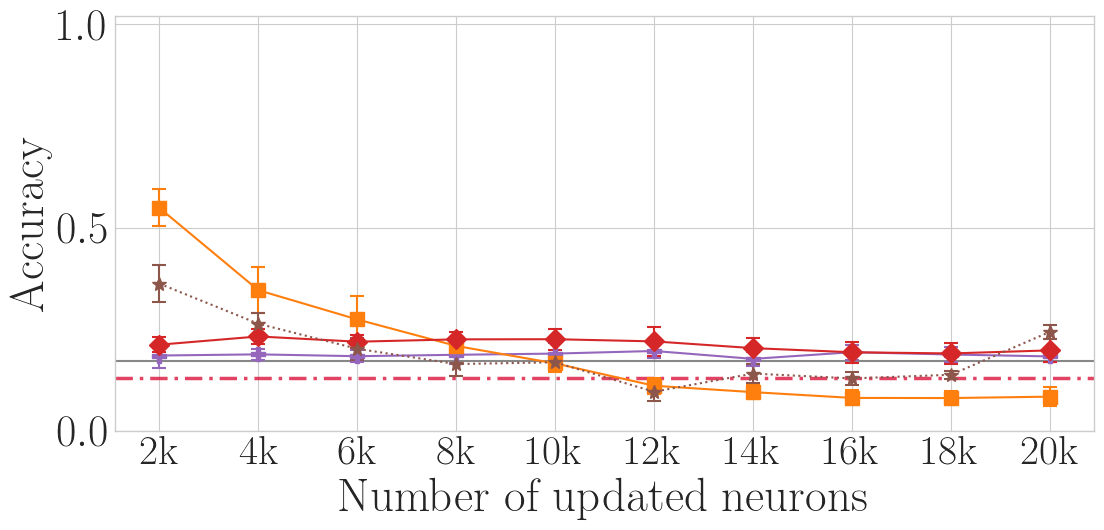

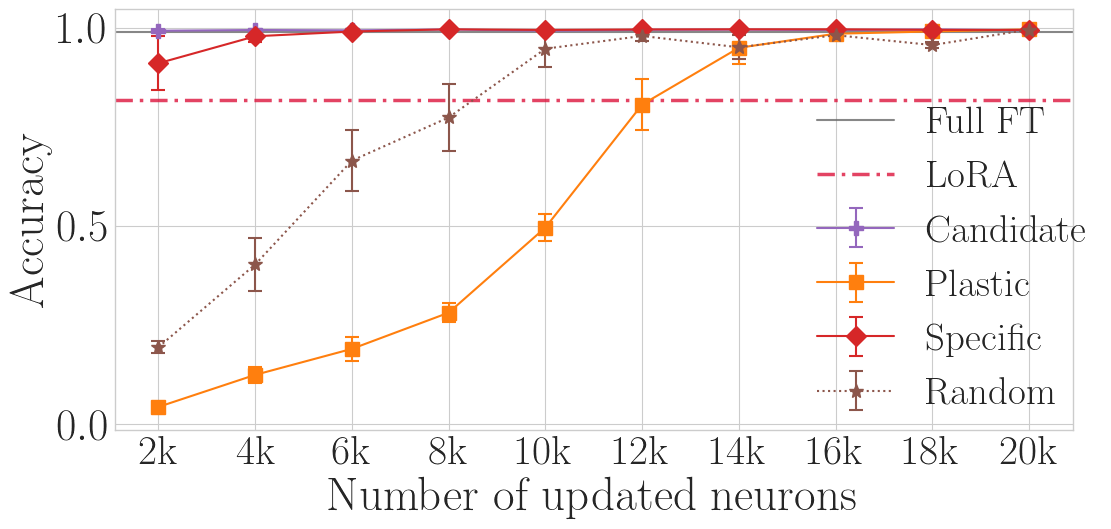

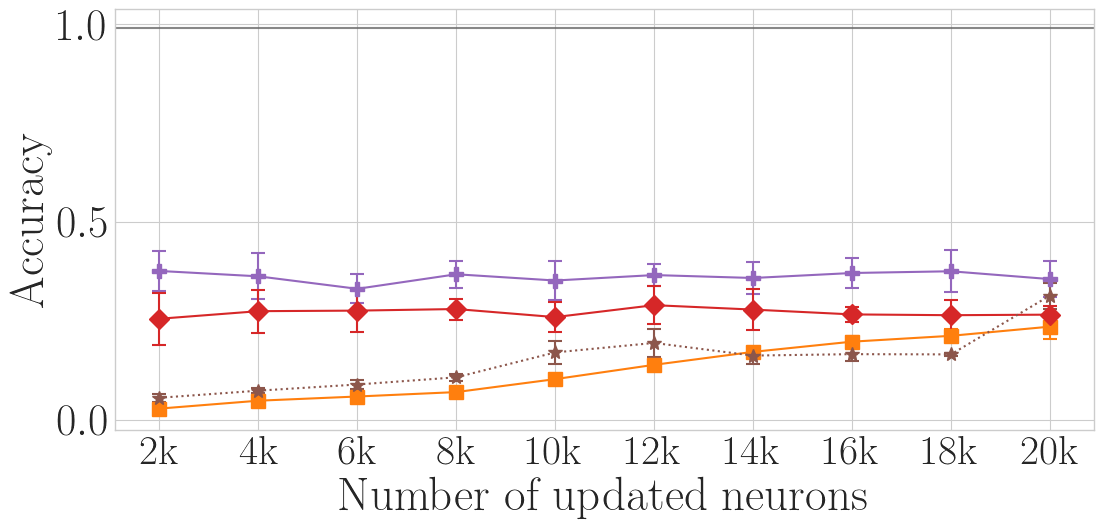

In [2]:
experiment_name = 'experiment_3_1_paper_version_LoRA'
filepath = '../results/experiment_3_1/'
strategies=['busy_A', 'free_A', 'spec_B', 'busy_B', 'rnd']
filename = 'experiment_3_1_paper_version_LoRA_submitted_conf.json'
loc_old_1 = 'lower left'
bbox_old_1 = (0, 0)
loc_new_1 = 'lower right'
bbox_new_1 = (1.05, -0.04)
loc_gen_1 = 'upper left'
bbox_gen_1 = (0, 1)
y_lim_old_1_1 = 0
y_lim_old_2_1 = 1.02
plot_editing_old_new_general(experiment_name, filename, filepath, strategies, 
                             loc_old_1, bbox_old_1, loc_new_1, bbox_new_1, loc_gen_1, bbox_gen_1,
                             y_lim_old_1_1, y_lim_old_2_1)

## Effect of the number of facts (Analysis in appendix)
#### Note that the following was done before we add the LoRa baseline. To obtain the results, we've ran `exp_3_1.py` with the following configuration `configs/gpt2-small_experiment3_1_iclr_submitted.yml` changing `sample_size_2` in the range `[10,100,1000]`
Results are in the json files:
- `experiment_3_1_2000_10.json` 
- `experiment_3_1_2000_100.json`
- `experiment_3_1_2000_1000.json`


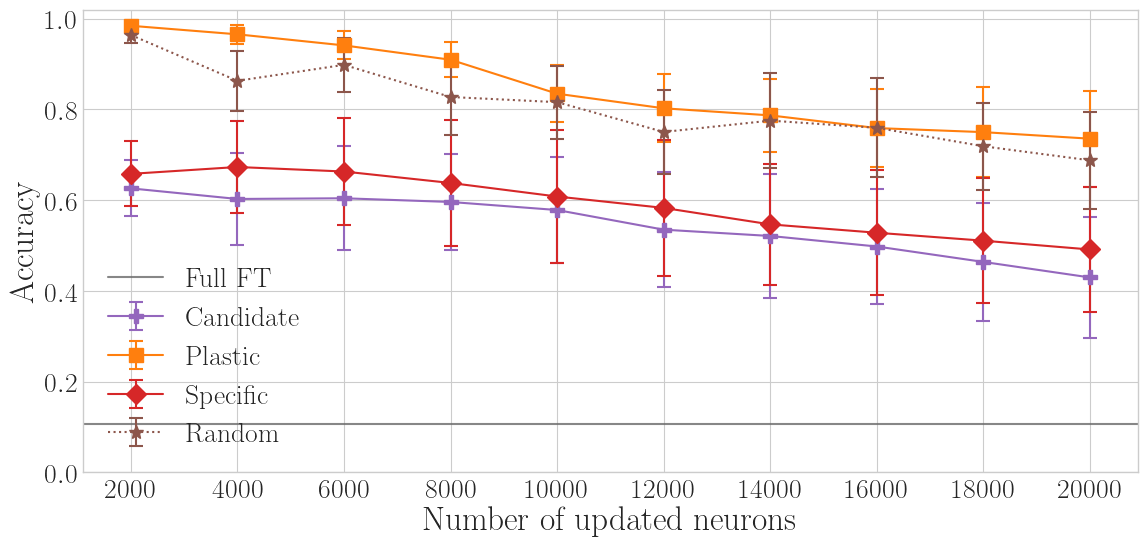

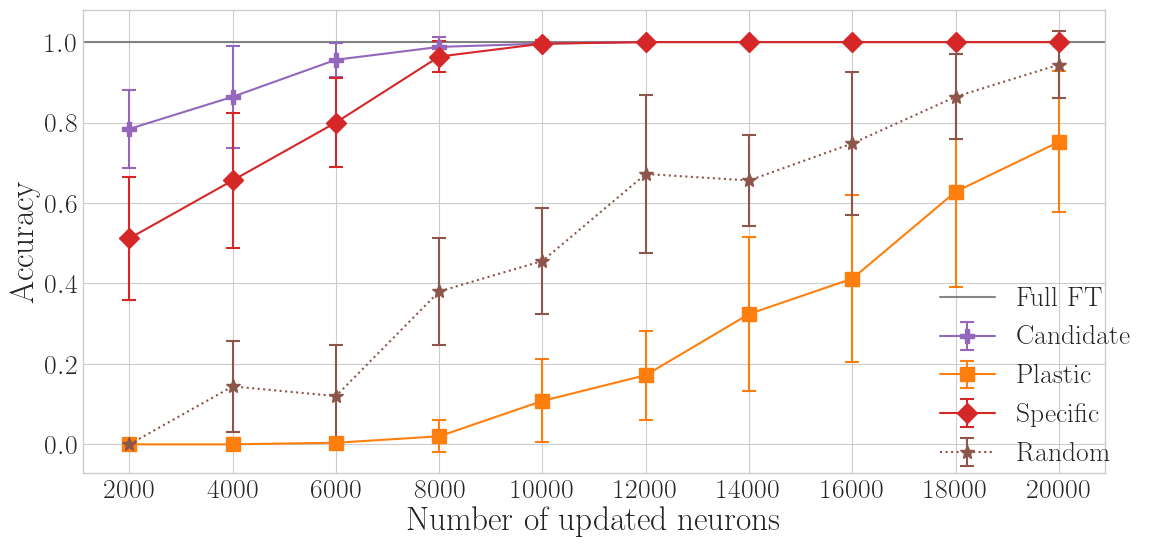

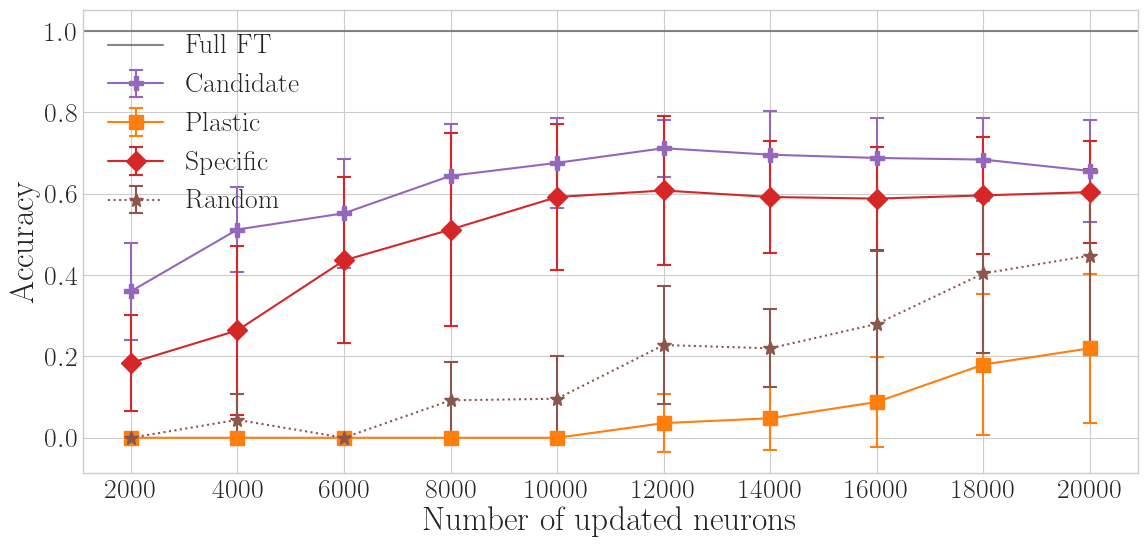

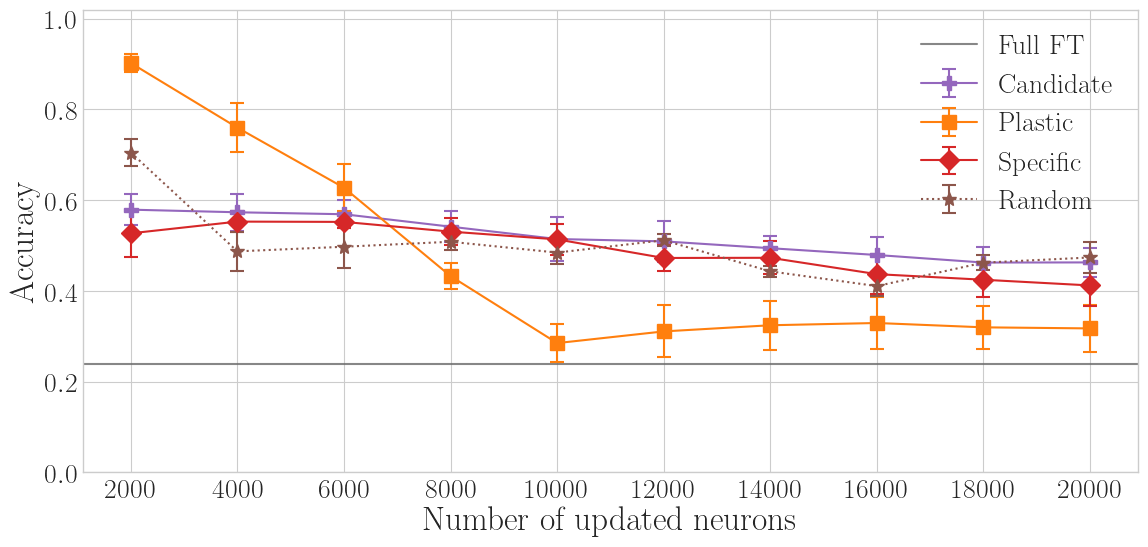

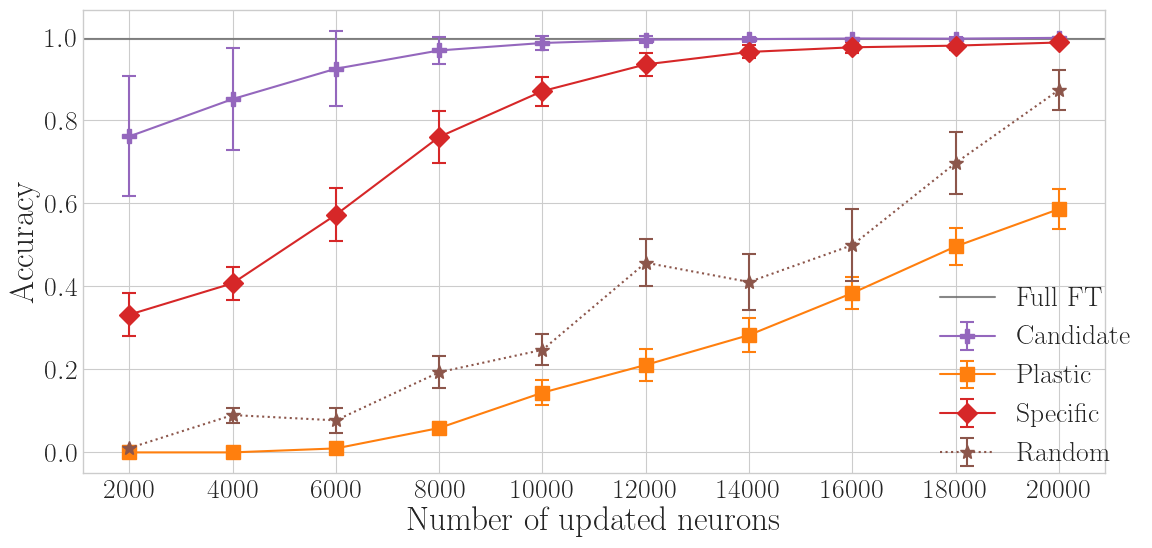

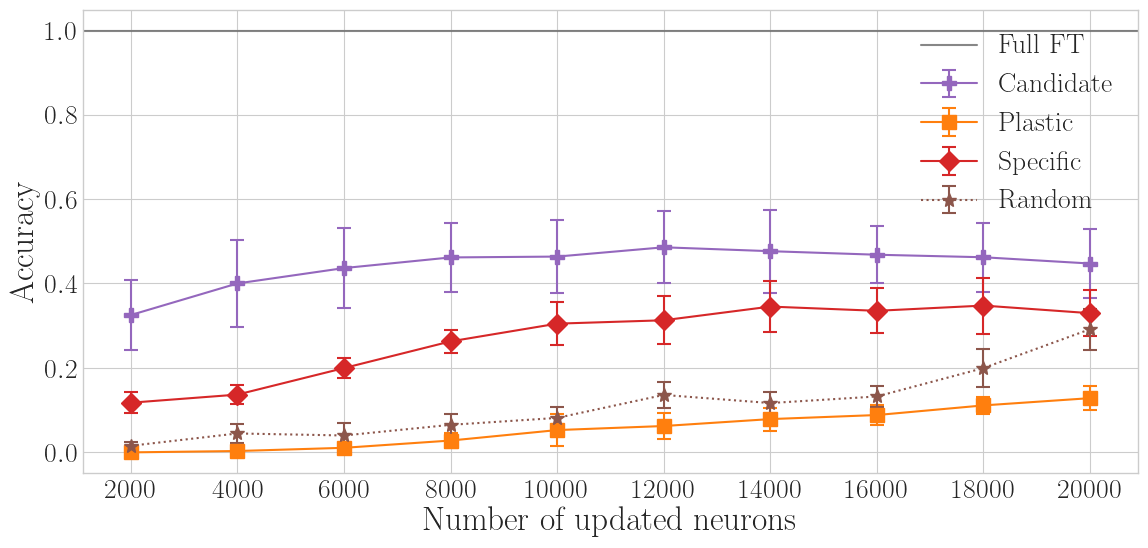

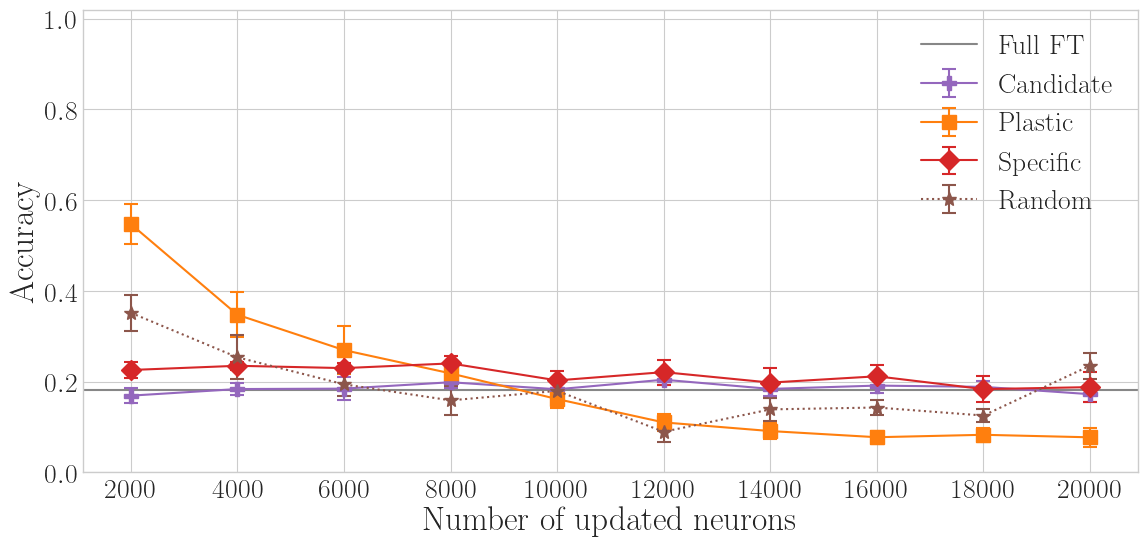

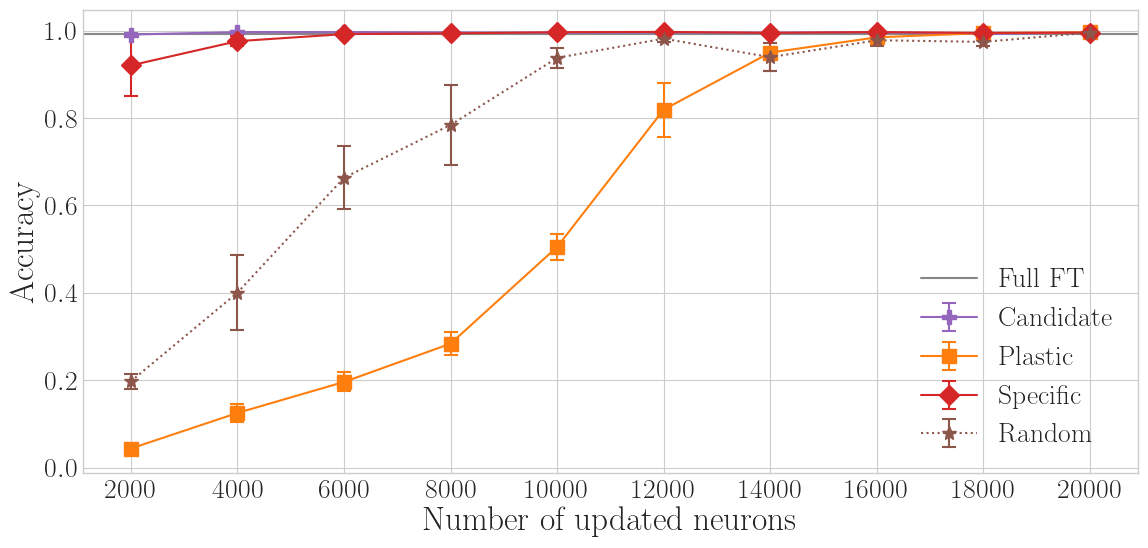

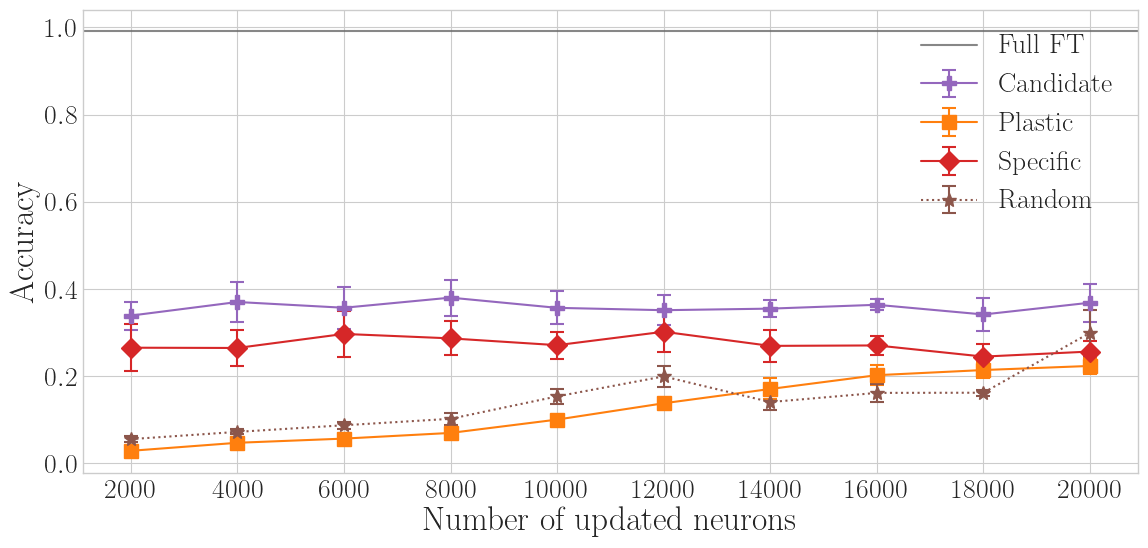

In [3]:
# Experiment 1 (N_SAMPLES = 10)
from retained_plots import plot_editing_old_new_general_noLoRa
experiment_name = 'experiment3_1'
filepath = '../results/experiment_3_1/'

filename = 'experiment_3_1_2000_10.json'
loc_old_1 = 'lower left'
bbox_old_1 = (0, 0)
loc_new_1 = 'lower right'
bbox_new_1 = (1.05, -0.04)
loc_gen_1 = 'upper left'
bbox_gen_1 = (0, 1)
y_lim_old_1_1 = 0
y_lim_old_2_1 = 1.02
plot_editing_old_new_general_noLoRa(experiment_name, filename, filepath, strategies, 
                             loc_old_1, bbox_old_1, loc_new_1, bbox_new_1, loc_gen_1, bbox_gen_1,
                             y_lim_old_1_1, y_lim_old_2_1)

# Experiment 2 (N_SAMPLES = 100)
filename = 'experiment_3_1_2000_100.json'
loc_old_2 = 'upper right'
bbox_old_2 = (1, 1)
loc_new_2 = 'lower right'
bbox_new_2 = (1.05, -0.04)
loc_gen_1 = 'upper right'
bbox_gen_1 = (1, 1)
y_lim_old_1_2 = 0
y_lim_old_2_2 = 1.02
plot_editing_old_new_general_noLoRa(experiment_name, filename, filepath, strategies, 
                             loc_old_2, bbox_old_2, loc_new_2, bbox_new_2, loc_gen_1, bbox_gen_1,
                             y_lim_old_1_2, y_lim_old_2_2)

# Experiment 3 (N_SAMPLES = 1000)
filename = 'experiment_3_1_2000_1000.json'
loc_old_3 = 'upper right'
bbox_old_3 = (1, 1)
loc_new_3 = 'lower right'
bbox_new_3 = (1, 0)
loc_gen_1 = 'upper right'
bbox_gen_1 = (1, 1)
y_lim_old_1_3 = 0
y_lim_old_2_3 = 1.02

plot_editing_old_new_general_noLoRa(experiment_name, filename, filepath, strategies, 
                             loc_old_3, bbox_old_3, loc_new_3, bbox_new_3, loc_gen_1, bbox_gen_1,
                             y_lim_old_1_3, y_lim_old_2_3)

## Print Results for tables in the paper 

### Full Accuracy Tables

In [4]:
import json
import numpy as np
from scipy.stats import hmean

def calculate_harmonic_mean(acc_A, acc_B, acc_gen):
    # Check if all values are greater than zero, otherwise return NaN
    if acc_A > 0 and acc_B > 0 and acc_gen > 0:
        return hmean([acc_A, acc_B, acc_gen])
    else:
        return np.nan

def print_results(N_SAMPLES, N_NEURONS):
    with open(f'../results/experiment_3_1/experiment_3_1_2000_{N_SAMPLES}.json', 'r') as file: 
        data = json.load(file)

    results = data['results']

    n_neurons = str(N_NEURONS)

    # Initialize lists to store values for standard deviation and harmonic mean calculations
    ftb_acc_A_list = []
    ftb_acc_B_list = []
    ftb_acc_gen_list = []

    cftb_spec_acc_A_list = []
    cftb_spec_acc_B_list = []
    cftb_spec_acc_gen_list = []

    cftb_freeA_acc_A_list = []
    cftb_freeA_acc_B_list = []
    cftb_freeA_acc_gen_list = []

    cftb_freeB_acc_A_list = []
    cftb_freeB_acc_B_list = []
    cftb_freeB_acc_gen_list = []

    cftb_busyA_acc_A_list = []
    cftb_busyA_acc_B_list = []
    cftb_busyA_acc_gen_list = []

    cftb_busyB_acc_A_list = []
    cftb_busyB_acc_B_list = []
    cftb_busyB_acc_gen_list = []

    cftb_rnd_acc_A_list = []
    cftb_rnd_acc_B_list = []
    cftb_rnd_acc_gen_list = []

    # Lists to store harmonic means for each category
    harmonic_means_ftb = []
    harmonic_means_spec = []
    harmonic_means_freeA = []
    harmonic_means_freeB = []
    harmonic_means_busyA = []
    harmonic_means_busyB = []
    harmonic_means_rnd = []

    for f in results:
        # FT NOT-B
        ftb_acc_A = results[f]['ft-notb']['avg_accA']
        ftb_acc_B = results[f]['ft-notb']['avg_accB']
        ftb_acc_gen = results[f]['ft-notb']['avg_acc_gen']
        
        # Append values to lists for standard deviation calculation
        ftb_acc_A_list.append(ftb_acc_A)
        ftb_acc_B_list.append(ftb_acc_B)
        ftb_acc_gen_list.append(ftb_acc_gen)

        # Calculate harmonic mean for this fold (FT NOT-B)
        harmonic_means_ftb.append(calculate_harmonic_mean(ftb_acc_A, ftb_acc_B, ftb_acc_gen))

        # C-FT NOT-B (spec)
        cftb_spec_acc_A = results[f]['cft-notb'][n_neurons]['spec_B']['avg_accA']
        cftb_spec_acc_B = results[f]['cft-notb'][n_neurons]['spec_B']['avg_accB']
        cftb_spec_acc_gen = results[f]['cft-notb'][n_neurons]['spec_B']['avg_acc_gen']

        cftb_spec_acc_A_list.append(cftb_spec_acc_A)
        cftb_spec_acc_B_list.append(cftb_spec_acc_B)
        cftb_spec_acc_gen_list.append(cftb_spec_acc_gen)

        # Calculate harmonic mean for this fold (C-FT NOT-B spec)
        harmonic_means_spec.append(calculate_harmonic_mean(cftb_spec_acc_A, cftb_spec_acc_B, cftb_spec_acc_gen))

        # C-FT NOT-B (free_A)
        cftb_freeA_acc_A = results[f]['cft-notb'][n_neurons]['free_A']['avg_accA']
        cftb_freeA_acc_B = results[f]['cft-notb'][n_neurons]['free_A']['avg_accB']
        cftb_freeA_acc_gen = results[f]['cft-notb'][n_neurons]['free_A']['avg_acc_gen']

        cftb_freeA_acc_A_list.append(cftb_freeA_acc_A)
        cftb_freeA_acc_B_list.append(cftb_freeA_acc_B)
        cftb_freeA_acc_gen_list.append(cftb_freeA_acc_gen)

        harmonic_means_freeA.append(calculate_harmonic_mean(cftb_freeA_acc_A, cftb_freeA_acc_B, cftb_freeA_acc_gen))

        # C-FT NOT-B (free_B)
        cftb_freeB_acc_A = results[f]['cft-notb'][n_neurons]['free_B']['avg_accA']
        cftb_freeB_acc_B = results[f]['cft-notb'][n_neurons]['free_B']['avg_accB']
        cftb_freeB_acc_gen = results[f]['cft-notb'][n_neurons]['free_B']['avg_acc_gen']

        cftb_freeB_acc_A_list.append(cftb_freeB_acc_A)
        cftb_freeB_acc_B_list.append(cftb_freeB_acc_B)
        cftb_freeB_acc_gen_list.append(cftb_freeB_acc_gen)

        harmonic_means_freeB.append(calculate_harmonic_mean(cftb_freeB_acc_A, cftb_freeB_acc_B, cftb_freeB_acc_gen))

        # C-FT NOT-B (busy_A)
        cftb_busyA_acc_A = results[f]['cft-notb'][n_neurons]['busy_A']['avg_accA']
        cftb_busyA_acc_B = results[f]['cft-notb'][n_neurons]['busy_A']['avg_accB']
        cftb_busyA_acc_gen = results[f]['cft-notb'][n_neurons]['busy_A']['avg_acc_gen']

        cftb_busyA_acc_A_list.append(cftb_busyA_acc_A)
        cftb_busyA_acc_B_list.append(cftb_busyA_acc_B)
        cftb_busyA_acc_gen_list.append(cftb_busyA_acc_gen)

        harmonic_means_busyA.append(calculate_harmonic_mean(cftb_busyA_acc_A, cftb_busyA_acc_B, cftb_busyA_acc_gen))

        # C-FT NOT-B (busy_B)
        cftb_busyB_acc_A = results[f]['cft-notb'][n_neurons]['busy_B']['avg_accA']
        cftb_busyB_acc_B = results[f]['cft-notb'][n_neurons]['busy_B']['avg_accB']
        cftb_busyB_acc_gen = results[f]['cft-notb'][n_neurons]['busy_B']['avg_acc_gen']

        cftb_busyB_acc_A_list.append(cftb_busyB_acc_A)
        cftb_busyB_acc_B_list.append(cftb_busyB_acc_B)
        cftb_busyB_acc_gen_list.append(cftb_busyB_acc_gen)

        harmonic_means_busyB.append(calculate_harmonic_mean(cftb_busyB_acc_A, cftb_busyB_acc_B, cftb_busyB_acc_gen))

        # C-FT NOT-B (rnd)
        cftb_rnd_acc_A = results[f]['cft-notb'][n_neurons]['rnd']['avg_accA']
        cftb_rnd_acc_B = results[f]['cft-notb'][n_neurons]['rnd']['avg_accB']
        cftb_rnd_acc_gen = results[f]['cft-notb'][n_neurons]['rnd']['avg_acc_gen']

        cftb_rnd_acc_A_list.append(cftb_rnd_acc_A)
        cftb_rnd_acc_B_list.append(cftb_rnd_acc_B)
        cftb_rnd_acc_gen_list.append(cftb_rnd_acc_gen)

        harmonic_means_rnd.append(calculate_harmonic_mean(cftb_rnd_acc_A, cftb_rnd_acc_B, cftb_rnd_acc_gen))

    # Calculate standard deviations for each metric
    ftb_acc_A_std = np.std(ftb_acc_A_list)
    ftb_acc_B_std = np.std(ftb_acc_B_list)
    ftb_acc_gen_std = np.std(ftb_acc_gen_list)

    cftb_spec_acc_A_std = np.std(cftb_spec_acc_A_list)
    cftb_spec_acc_B_std = np.std(cftb_spec_acc_B_list)
    cftb_spec_acc_gen_std = np.std(cftb_spec_acc_gen_list)

    cftb_freeA_acc_A_std = np.std(cftb_freeA_acc_A_list)
    cftb_freeA_acc_B_std = np.std(cftb_freeA_acc_B_list)
    cftb_freeA_acc_gen_std = np.std(cftb_freeA_acc_gen_list)

    cftb_freeB_acc_A_std = np.std(cftb_freeB_acc_A_list)
    cftb_freeB_acc_B_std = np.std(cftb_freeB_acc_B_list)
    cftb_freeB_acc_gen_std = np.std(cftb_freeB_acc_gen_list)

    cftb_busyA_acc_A_std = np.std(cftb_busyA_acc_A_list)
    cftb_busyA_acc_B_std = np.std(cftb_busyA_acc_B_list)
    cftb_busyA_acc_gen_std = np.std(cftb_busyA_acc_gen_list)

    cftb_busyB_acc_A_std = np.std(cftb_busyB_acc_A_list)
    cftb_busyB_acc_B_std = np.std(cftb_busyB_acc_B_list)
    cftb_busyB_acc_gen_std = np.std(cftb_busyB_acc_gen_list)

    cftb_rnd_acc_A_std = np.std(cftb_rnd_acc_A_list)
    cftb_rnd_acc_B_std = np.std(cftb_rnd_acc_B_list)
    cftb_rnd_acc_gen_std = np.std(cftb_rnd_acc_gen_list)

    # Calculate standard deviation of harmonic means
    harmonic_mean_ftb_std = np.std([x for x in harmonic_means_ftb if not np.isnan(x)])
    harmonic_mean_spec_std = np.std([x for x in harmonic_means_spec if not np.isnan(x)])
    harmonic_mean_freeA_std = np.std([x for x in harmonic_means_freeA if not np.isnan(x)])
    harmonic_mean_freeB_std = np.std([x for x in harmonic_means_freeB if not np.isnan(x)])
    harmonic_mean_busyA_std = np.std([x for x in harmonic_means_busyA if not np.isnan(x)])
    harmonic_mean_busyB_std = np.std([x for x in harmonic_means_busyB if not np.isnan(x)])
    harmonic_mean_rnd_std = np.std([x for x in harmonic_means_rnd if not np.isnan(x)])

    # Print results (add standard deviations and harmonic means to the output)
    print(f'NUMBER OF NEURONS: {n_neurons} NUMBER of SAMPLES: {N_SAMPLES}')
    print(f"Accuracy FT NOT-B -> A: {np.mean(ftb_acc_A_list):.3f} ± {ftb_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(ftb_acc_B_list):.3f} ± {ftb_acc_B_std:.3f}, "
          f"GEN: {np.mean(ftb_acc_gen_list):.3f} ± {ftb_acc_gen_std:.3f}")
    print(f"Harmonic Mean FT NOT-B -> Mean: {np.nanmean(harmonic_means_ftb):.3f}, "
          f"Std: {harmonic_mean_ftb_std:.3f}")

    print(f"Accuracy C-FT NOT-B (spec) -> A: {np.mean(cftb_spec_acc_A_list):.3f} ± {cftb_spec_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(cftb_spec_acc_B_list):.3f} ± {cftb_spec_acc_B_std:.3f}, "
          f"GEN: {np.mean(cftb_spec_acc_gen_list):.3f} ± {cftb_spec_acc_gen_std:.3f}")
    print(f"Harmonic Mean C-FT NOT-B (spec) -> Mean: {np.nanmean(harmonic_means_spec):.3f}, "
          f"Std: {harmonic_mean_spec_std:.3f}")

    print(f"Accuracy C-FT NOT-B (free_A) -> A: {np.mean(cftb_freeA_acc_A_list):.3f} ± {cftb_freeA_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(cftb_freeA_acc_B_list):.3f} ± {cftb_freeA_acc_B_std:.3f}, "
          f"GEN: {np.mean(cftb_freeA_acc_gen_list):.3f} ± {cftb_freeA_acc_gen_std:.3f}")
    print(f"Harmonic Mean C-FT NOT-B (free_A) -> Mean: {np.nanmean(harmonic_means_freeA):.3f}, "
          f"Std: {harmonic_mean_freeA_std:.3f}")

    print(f"Accuracy C-FT NOT-B (free_B) -> A: {np.mean(cftb_freeB_acc_A_list):.3f} ± {cftb_freeB_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(cftb_freeB_acc_B_list):.3f} ± {cftb_freeB_acc_B_std:.3f}, "
          f"GEN: {np.mean(cftb_freeB_acc_gen_list):.3f} ± {cftb_freeB_acc_gen_std:.3f}")
    print(f"Harmonic Mean C-FT NOT-B (free_B) -> Mean: {np.nanmean(harmonic_means_freeB):.3f}, "
          f"Std: {harmonic_mean_freeB_std:.3f}")

    print(f"Accuracy C-FT NOT-B (busy_A) -> A: {np.mean(cftb_busyA_acc_A_list):.3f} ± {cftb_busyA_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(cftb_busyA_acc_B_list):.3f} ± {cftb_busyA_acc_B_std:.3f}, "
          f"GEN: {np.mean(cftb_busyA_acc_gen_list):.3f} ± {cftb_busyA_acc_gen_std:.3f}")
    print(f"Harmonic Mean C-FT NOT-B (busy_A) -> Mean: {np.nanmean(harmonic_means_busyA):.3f}, "
          f"Std: {harmonic_mean_busyA_std:.3f}")

    print(f"Accuracy C-FT NOT-B (busy_B) -> A: {np.mean(cftb_busyB_acc_A_list):.3f} ± {cftb_busyB_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(cftb_busyB_acc_B_list):.3f} ± {cftb_busyB_acc_B_std:.3f}, "
          f"GEN: {np.mean(cftb_busyB_acc_gen_list):.3f} ± {cftb_busyB_acc_gen_std:.3f}")
    print(f"Harmonic Mean C-FT NOT-B (busy_B) -> Mean: {np.nanmean(harmonic_means_busyB):.3f}, "
          f"Std: {harmonic_mean_busyB_std:.3f}")

    print(f"Accuracy C-FT NOT-B (rnd) -> A: {np.mean(cftb_rnd_acc_A_list):.3f} ± {cftb_rnd_acc_A_std:.3f}, "
          f"NOT(B): {np.mean(cftb_rnd_acc_B_list):.3f} ± {cftb_rnd_acc_B_std:.3f}, "
          f"GEN: {np.mean(cftb_rnd_acc_gen_list):.3f} ± {cftb_rnd_acc_gen_std:.3f}")
    print(f"Harmonic Mean C-FT NOT-B (rnd) -> Mean: {np.nanmean(harmonic_means_rnd):.3f}, "
          f"Std: {harmonic_mean_rnd_std:.3f}")

print('20k neurons----------')
print_results(10, 20000)
print_results(100, 20000)
print_results(1000, 20000)
print('8k neurons----------')
print_results(10, 8000)
print_results(100, 8000)
print_results(1000, 8000)
print('6k neurons----------')
print_results(10, 6000)
print_results(100, 6000)
print_results(1000, 6000)
print('4k neurons----------')
print_results(10, 4000)
print_results(100, 4000)
print_results(1000,4000)

20k neurons----------
NUMBER OF NEURONS: 20000 NUMBER of SAMPLES: 10
Accuracy FT NOT-B -> A: 0.107 ± 0.082, NOT(B): 1.000 ± 0.000, GEN: 0.576 ± 0.117
Harmonic Mean FT NOT-B -> Mean: 0.222, Std: 0.116
Accuracy C-FT NOT-B (spec) -> A: 0.491 ± 0.137, NOT(B): 1.000 ± 0.000, GEN: 0.604 ± 0.126
Harmonic Mean C-FT NOT-B (spec) -> Mean: 0.621, Std: 0.109
Accuracy C-FT NOT-B (free_A) -> A: 0.735 ± 0.105, NOT(B): 0.752 ± 0.175, GEN: 0.220 ± 0.183
Harmonic Mean C-FT NOT-B (free_A) -> Mean: 0.434, Std: 0.185
Accuracy C-FT NOT-B (free_B) -> A: 0.794 ± 0.093, NOT(B): 0.732 ± 0.176, GEN: 0.204 ± 0.169
Harmonic Mean C-FT NOT-B (free_B) -> Mean: 0.424, Std: 0.201
Accuracy C-FT NOT-B (busy_A) -> A: 0.449 ± 0.109, NOT(B): 1.000 ± 0.000, GEN: 0.616 ± 0.091
Harmonic Mean C-FT NOT-B (busy_A) -> Mean: 0.606, Std: 0.084
Accuracy C-FT NOT-B (busy_B) -> A: 0.430 ± 0.134, NOT(B): 1.000 ± 0.000, GEN: 0.656 ± 0.125
Harmonic Mean C-FT NOT-B (busy_B) -> Mean: 0.597, Std: 0.116
Accuracy C-FT NOT-B (rnd) -> A: 0.688 ±

/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/ipykernel_launcher.py:194: RuntimeWarning: Mean of empty slice
/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/ipykernel_launcher.py:200: RuntimeWarning: Mean of empty slice
/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/ipykernel_launcher.py:218: RuntimeWarning: Mean of empty slice


In [5]:
import json
import numpy as np
import pandas as pd
from scipy.stats import hmean
import os

def calculate_harmonic_mean(acc_A, acc_B, acc_gen):
    """
    Calculate the harmonic mean of three accuracy metrics.
    Returns NaN if any of the inputs are non-positive.
    """
    if acc_A > 0 and acc_B > 0 and acc_gen > 0:
        return hmean([acc_A, acc_B, acc_gen])
    else:
        return np.nan

def initialize_lists():
    """
    Initialize all necessary lists to store accuracy metrics and harmonic means.
    """
    return {
        'ft_notb': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
        'cftb_spec': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
        'cftb_freeA': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
        'cftb_freeB': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
        'cftb_busyA': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
        'cftb_busyB': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
        'cftb_rnd': {'acc_A': [], 'acc_B': [], 'acc_gen': [], 'hmean': []},
    }

def process_results(data, n_neurons, metrics):
    """
    Process each fold's results and append to the corresponding lists.
    """
    n_neurons_str = str(n_neurons)

    for f in data['results']:
        # FT NOT-B
        ftb = data['results'][f]['ft-notb']
        ftb_acc_A = ftb['avg_accA']
        ftb_acc_B = ftb['avg_accB']
        ftb_acc_gen = ftb['avg_acc_gen']
        metrics['ft_notb']['acc_A'].append(ftb_acc_A)
        metrics['ft_notb']['acc_B'].append(ftb_acc_B)
        metrics['ft_notb']['acc_gen'].append(ftb_acc_gen)
        metrics['ft_notb']['hmean'].append(calculate_harmonic_mean(ftb_acc_A, ftb_acc_B, ftb_acc_gen))

        # C-FT NOT-B (spec)
        spec = data['results'][f]['cft-notb'][n_neurons_str]['spec_B']
        spec_acc_A = spec['avg_accA']
        spec_acc_B = spec['avg_accB']
        spec_acc_gen = spec['avg_acc_gen']
        metrics['cftb_spec']['acc_A'].append(spec_acc_A)
        metrics['cftb_spec']['acc_B'].append(spec_acc_B)
        metrics['cftb_spec']['acc_gen'].append(spec_acc_gen)
        metrics['cftb_spec']['hmean'].append(calculate_harmonic_mean(spec_acc_A, spec_acc_B, spec_acc_gen))

        # C-FT NOT-B (free_A)
        freeA = data['results'][f]['cft-notb'][n_neurons_str]['free_A']
        freeA_acc_A = freeA['avg_accA']
        freeA_acc_B = freeA['avg_accB']
        freeA_acc_gen = freeA['avg_acc_gen']
        metrics['cftb_freeA']['acc_A'].append(freeA_acc_A)
        metrics['cftb_freeA']['acc_B'].append(freeA_acc_B)
        metrics['cftb_freeA']['acc_gen'].append(freeA_acc_gen)
        metrics['cftb_freeA']['hmean'].append(calculate_harmonic_mean(freeA_acc_A, freeA_acc_B, freeA_acc_gen))

        # C-FT NOT-B (free_B)
        freeB = data['results'][f]['cft-notb'][n_neurons_str]['free_B']
        freeB_acc_A = freeB['avg_accA']
        freeB_acc_B = freeB['avg_accB']
        freeB_acc_gen = freeB['avg_acc_gen']
        metrics['cftb_freeB']['acc_A'].append(freeB_acc_A)
        metrics['cftb_freeB']['acc_B'].append(freeB_acc_B)
        metrics['cftb_freeB']['acc_gen'].append(freeB_acc_gen)
        metrics['cftb_freeB']['hmean'].append(calculate_harmonic_mean(freeB_acc_A, freeB_acc_B, freeB_acc_gen))

        # C-FT NOT-B (busy_A)
        busyA = data['results'][f]['cft-notb'][n_neurons_str]['busy_A']
        busyA_acc_A = busyA['avg_accA']
        busyA_acc_B = busyA['avg_accB']
        busyA_acc_gen = busyA['avg_acc_gen']
        metrics['cftb_busyA']['acc_A'].append(busyA_acc_A)
        metrics['cftb_busyA']['acc_B'].append(busyA_acc_B)
        metrics['cftb_busyA']['acc_gen'].append(busyA_acc_gen)
        metrics['cftb_busyA']['hmean'].append(calculate_harmonic_mean(busyA_acc_A, busyA_acc_B, busyA_acc_gen))

        # C-FT NOT-B (busy_B)
        busyB = data['results'][f]['cft-notb'][n_neurons_str]['busy_B']
        busyB_acc_A = busyB['avg_accA']
        busyB_acc_B = busyB['avg_accB']
        busyB_acc_gen = busyB['avg_acc_gen']
        metrics['cftb_busyB']['acc_A'].append(busyB_acc_A)
        metrics['cftb_busyB']['acc_B'].append(busyB_acc_B)
        metrics['cftb_busyB']['acc_gen'].append(busyB_acc_gen)
        metrics['cftb_busyB']['hmean'].append(calculate_harmonic_mean(busyB_acc_A, busyB_acc_B, busyB_acc_gen))

        # C-FT NOT-B (rnd)
        rnd = data['results'][f]['cft-notb'][n_neurons_str]['rnd']
        rnd_acc_A = rnd['avg_accA']
        rnd_acc_B = rnd['avg_accB']
        rnd_acc_gen = rnd['avg_acc_gen']
        metrics['cftb_rnd']['acc_A'].append(rnd_acc_A)
        metrics['cftb_rnd']['acc_B'].append(rnd_acc_B)
        metrics['cftb_rnd']['acc_gen'].append(rnd_acc_gen)
        metrics['cftb_rnd']['hmean'].append(calculate_harmonic_mean(rnd_acc_A, rnd_acc_B, rnd_acc_gen))

def compute_statistics(metrics):
    """
    Compute mean and standard deviation for each metric.
    """
    stats = {}
    for key, submetrics in metrics.items():
        stats[key] = {}
        for metric, values in submetrics.items():
            if metric != 'hmean':
                mean = np.mean(values)
                std = np.std(values)
                stats[key][f'{metric}_mean'] = mean
                stats[key][f'{metric}_std'] = std
            else:
                # For harmonic mean, exclude NaN values
                valid_values = [x for x in values if not np.isnan(x)]
                mean = np.nanmean(valid_values)
                std = np.std(valid_values)
                stats[key][f'{metric}_mean'] = mean
                stats[key][f'{metric}_std'] = std
    return stats

def print_statistics(n_neurons, n_samples, stats):
    """
    Print the statistics in a formatted manner.
    """
    print(f'NUMBER OF NEURONS: {n_neurons} NUMBER of SAMPLES: {n_samples}')
    
    def print_strategy(strategy_name, strategy_stats):
        print(f"Accuracy {strategy_name} -> A: {strategy_stats['acc_A_mean']:.3f} ± {strategy_stats['acc_A_std']:.3f}, "
              f"NOT(B): {strategy_stats['acc_B_mean']:.3f} ± {strategy_stats['acc_B_std']:.3f}, "
              f"GEN: {strategy_stats['acc_gen_mean']:.3f} ± {strategy_stats['acc_gen_std']:.3f}")
        print(f"Harmonic Mean {strategy_name} -> Mean: {strategy_stats['hmean_mean']:.3f}, "
              f"Std: {strategy_stats['hmean_std']:.3f}")
    
    strategy_mapping = {
        'ft_notb': 'FT NOT-B',
        'cftb_spec': 'C-FT NOT-B (spec)',
        'cftb_freeA': 'C-FT NOT-B (free_A)',
        'cftb_freeB': 'C-FT NOT-B (free_B)',
        'cftb_busyA': 'C-FT NOT-B (busy_A)',
        'cftb_busyB': 'C-FT NOT-B (busy_B)',
        'cftb_rnd': 'C-FT NOT-B (rnd)'
    }
    
    for key in strategy_mapping:
        print_strategy(strategy_mapping[key], stats[key])
        print()  # Add an empty line for better readability

def generate_latex_table(n_neurons, results_df, output_dir):
    """
    Generate a LaTeX table for the given number of neurons.
    """
    strategies = {
        'FT NOT-B': 'ft_notb',
        'C-FT NOT-B (spec)': 'cftb_spec',
        'C-FT NOT-B (free_A)': 'cftb_freeA',
        'C-FT NOT-B (free_B)': 'cftb_freeB',
        'C-FT NOT-B (busy_A)': 'cftb_busyA',
        'C-FT NOT-B (busy_B)': 'cftb_busyB',
        'C-FT NOT-B (rnd)': 'cftb_rnd'
    }
    
    # Filter DataFrame for the current number of neurons
    df_neurons = results_df[results_df['N_NEURONS'] == n_neurons]
    
    # Initialize LaTeX table string
    table_str = f"""\\begin{{table}}[h]
\\centering
\\caption{{Neuron Editing Results for N={n_neurons:,} Neurons}}
\\label{{tab:neuron_editing_{n_neurons}}}
\\resizebox{{\\textwidth}}{{!}}{{%
\\begin{{tabular}}{{cccccc}}
\\toprule
\\textbf{{Samples}} & \\textbf{{Strategy}} & \\textbf{{Accuracy A}} & \\textbf{{Accuracy NOT(B)}} & \\textbf{{Accuracy GEN}} & \\textbf{{Harmonic Mean}} \\\\
\\midrule
"""

    for n_samples in sorted(df_neurons['N_SAMPLES'].unique()):
        df_samples = df_neurons[df_neurons['N_SAMPLES'] == n_samples]
        table_str += f"\\multirow{{{len(strategies)}}}{{*}}{{{n_samples}}} \\\\ \n"
        for idx, (strategy_name, strategy_key) in enumerate(strategies.items()):
            row = df_samples[df_samples['Strategy'] == strategy_name].iloc[0]
            acc_a = f"{row['Accuracy_A']:.3f} ({row['Accuracy_A_std']:.3f})"
            acc_notb = f"{row['Accuracy_NOTB']:.3f} ({row['Accuracy_NOTB_std']:.3f})"
            acc_gen = f"{row['Accuracy_GEN']:.3f} ({row['Accuracy_GEN_std']:.3f})"
            hmean = f"{row['Harmonic_Mean']:.3f} ({row['Harmonic_Mean_std']:.3f})" if not np.isnan(row['Harmonic_Mean']) else "nan"
            if idx == 0:
                table_str += f" & {strategy_name:<25} & {acc_a} & {acc_notb} & {acc_gen} & {hmean} \\\\ \n"
            else:
                table_str += f" & {strategy_name:<25} & {acc_a} & {acc_notb} & {acc_gen} & {hmean} \\\\ \n"
        table_str += "\\midrule\n"

    # Remove the last \midrule and add \bottomrule
    table_str = table_str.rstrip("\\midrule\n") + "\\bottomrule\n"

    table_str += """\\end{tabular}
}
\\end{table}
"""

    # Define the output file path
    latex_filename = f"neuron_editing_{n_neurons}.tex"
    latex_filepath = os.path.join(output_dir, latex_filename)

    # Write the LaTeX table to the file
    with open(latex_filepath, 'w') as f:
        f.write(table_str)
    print(f"LaTeX table for {n_neurons} neurons written to {latex_filepath}")

def print_results(N_SAMPLES, N_NEURONS, aggregated_results):
    """
    Process the results for given N_SAMPLES and N_NEURONS,
    compute statistics, and store them for further use.
    """
    # Path to the JSON file
    json_path = f'../results/experiment_3_1/experiment_3_1_2000_{N_SAMPLES}.json'
    
    # Load the JSON data
    with open(json_path, 'r') as file: 
        data = json.load(file)
    
    # Initialize metrics storage
    metrics = initialize_lists()
    
    # Process each fold and collect metrics
    process_results(data, N_NEURONS, metrics)
    
    # Compute statistics
    stats = compute_statistics(metrics)
    
    # Print statistics
    print_statistics(N_NEURONS, N_SAMPLES, stats)
    
    # Store the statistics in aggregated_results
    strategy_mapping = {
        'ft_notb': 'FT NOT-B',
        'cftb_spec': 'C-FT NOT-B (spec)',
        'cftb_freeA': 'C-FT NOT-B (free_A)',
        'cftb_freeB': 'C-FT NOT-B (free_B)',
        'cftb_busyA': 'C-FT NOT-B (busy_A)',
        'cftb_busyB': 'C-FT NOT-B (busy_B)',
        'cftb_rnd': 'C-FT NOT-B (rnd)'
    }
    
    for key, strategy_name in strategy_mapping.items():
        aggregated_results.append({
            'N_SAMPLES': N_SAMPLES,
            'N_NEURONS': N_NEURONS,
            'Strategy': strategy_name,
            'Accuracy_A': stats[key]['acc_A_mean'],
            'Accuracy_A_std': stats[key]['acc_A_std'],
            'Accuracy_NOTB': stats[key]['acc_B_mean'],
            'Accuracy_NOTB_std': stats[key]['acc_B_std'],
            'Accuracy_GEN': stats[key]['acc_gen_mean'],
            'Accuracy_GEN_std': stats[key]['acc_gen_std'],
            'Harmonic_Mean': stats[key]['hmean_mean'],
            'Harmonic_Mean_std': stats[key]['hmean_std']
        })

def main():
    # Define the output directory
    output_dir = '/home/sclemente/project/epmem_edit/experiments/gpt2-small/experiment_3_1/results'
    
    # Create the directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Initialize a list to collect all results
    aggregated_results = []
    
    # Define the configurations to process
    configurations = [
        ('20k neurons', 20000),
        ('8k neurons', 8000),
        ('6k neurons', 6000),
        ('4k neurons', 4000)  # Assuming '4k neurons' should correspond to 4000
    ]
    
    # Define the sample sizes
    sample_sizes = [10, 100, 1000]
    
    # Iterate over each configuration and sample size
    for label, n_neurons in configurations:
        print(f'\n{label}----------')
        for n_samples in sample_sizes:
            print_results(n_samples, n_neurons, aggregated_results)
    
    # Convert the aggregated results to a DataFrame
    results_df = pd.DataFrame(aggregated_results)
    
    # Define the JSON and CSV file paths
    json_output_path = os.path.join(output_dir, 'aggregated_results.json')
    csv_output_path = os.path.join(output_dir, 'aggregated_results.csv')
    
    # Save the results to JSON
    with open(json_output_path, 'w') as f_json:
        json.dump(aggregated_results, f_json, indent=4)
    print(f"\nAggregated results written to {json_output_path}")
    
    # Save the results to CSV
    results_df.to_csv(csv_output_path, index=False)
    print(f"Aggregated results written to {csv_output_path}")
    
    # Generate LaTeX tables for each number of neurons
    for n_neurons in results_df['N_NEURONS'].unique():
        generate_latex_table(n_neurons, results_df, output_dir)

if __name__ == "__main__":
    main()


20k neurons----------
NUMBER OF NEURONS: 20000 NUMBER of SAMPLES: 10
Accuracy FT NOT-B -> A: 0.107 ± 0.082, NOT(B): 1.000 ± 0.000, GEN: 0.576 ± 0.117
Harmonic Mean FT NOT-B -> Mean: 0.222, Std: 0.116

Accuracy C-FT NOT-B (spec) -> A: 0.491 ± 0.137, NOT(B): 1.000 ± 0.000, GEN: 0.604 ± 0.126
Harmonic Mean C-FT NOT-B (spec) -> Mean: 0.621, Std: 0.109

Accuracy C-FT NOT-B (free_A) -> A: 0.735 ± 0.105, NOT(B): 0.752 ± 0.175, GEN: 0.220 ± 0.183
Harmonic Mean C-FT NOT-B (free_A) -> Mean: 0.434, Std: 0.185

Accuracy C-FT NOT-B (free_B) -> A: 0.794 ± 0.093, NOT(B): 0.732 ± 0.176, GEN: 0.204 ± 0.169
Harmonic Mean C-FT NOT-B (free_B) -> Mean: 0.424, Std: 0.201

Accuracy C-FT NOT-B (busy_A) -> A: 0.449 ± 0.109, NOT(B): 1.000 ± 0.000, GEN: 0.616 ± 0.091
Harmonic Mean C-FT NOT-B (busy_A) -> Mean: 0.606, Std: 0.084

Accuracy C-FT NOT-B (busy_B) -> A: 0.430 ± 0.134, NOT(B): 1.000 ± 0.000, GEN: 0.656 ± 0.125
Harmonic Mean C-FT NOT-B (busy_B) -> Mean: 0.597, Std: 0.116

Accuracy C-FT NOT-B (rnd) -> A: 

/opt/anaconda/anaconda3/envs/elias/lib/python3.7/site-packages/ipykernel_launcher.py:124: RuntimeWarning: Mean of empty slice
